# Imports/Loading dataset

In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import ttest_rel
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier # boosting
from sklearn.ensemble import RandomForestClassifier # bagging

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/HW1/heart.csv")

# Task 1

Implement a Decision Tree Classifier for your classification problem. You
may use a built-in package to implement your classifier.

Resources:

https://www.geeksforgeeks.org/building-and-implementing-decision-tree-classifiers-with-scikit-learn-a-comprehensive-guide/

https://www.youtube.com/watch?v=rsyrZnZ8J2o

In [2]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [3]:
# check types
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
# encode data for sklearn's DecisionTreeClassifier package
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform='pandas')
X = encoder.fit_transform(df[['ChestPainType', 'Sex', 'ExerciseAngina', 'RestingECG', 'ST_Slope']])

# drop the categorical columns, and append the encoded data to the dataframe for further use
df = df.drop(['ChestPainType', 'Sex', 'ExerciseAngina', 'RestingECG', 'ST_Slope'], axis=1)
df = pd.concat([df, X], axis=1)
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'Sex_F', 'Sex_M',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat',
       'ST_Slope_Up'],
      dtype='object')

I did not standardize the dataset, because decision tree classifiers are not sensitivie to the scale of input features.

In [5]:
# ensure all data is encoded properly
for i in range(len(df.dtypes)):
  if(df.dtypes.iloc[i] == 'object'):
    print(f"Did not encode {i}th feature correctly")
print("Successfully encoded all features")

# can see all datatypes are ints or floats, and therefore we can move on

Successfully encoded all features


## 1.Visualize the decision tree structure for at least three different parameter settings. Comment on how the depth and complexity change the tree.

In [6]:
# get target (y) and input (X) values
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

# use 30% of the input dataset for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 99)

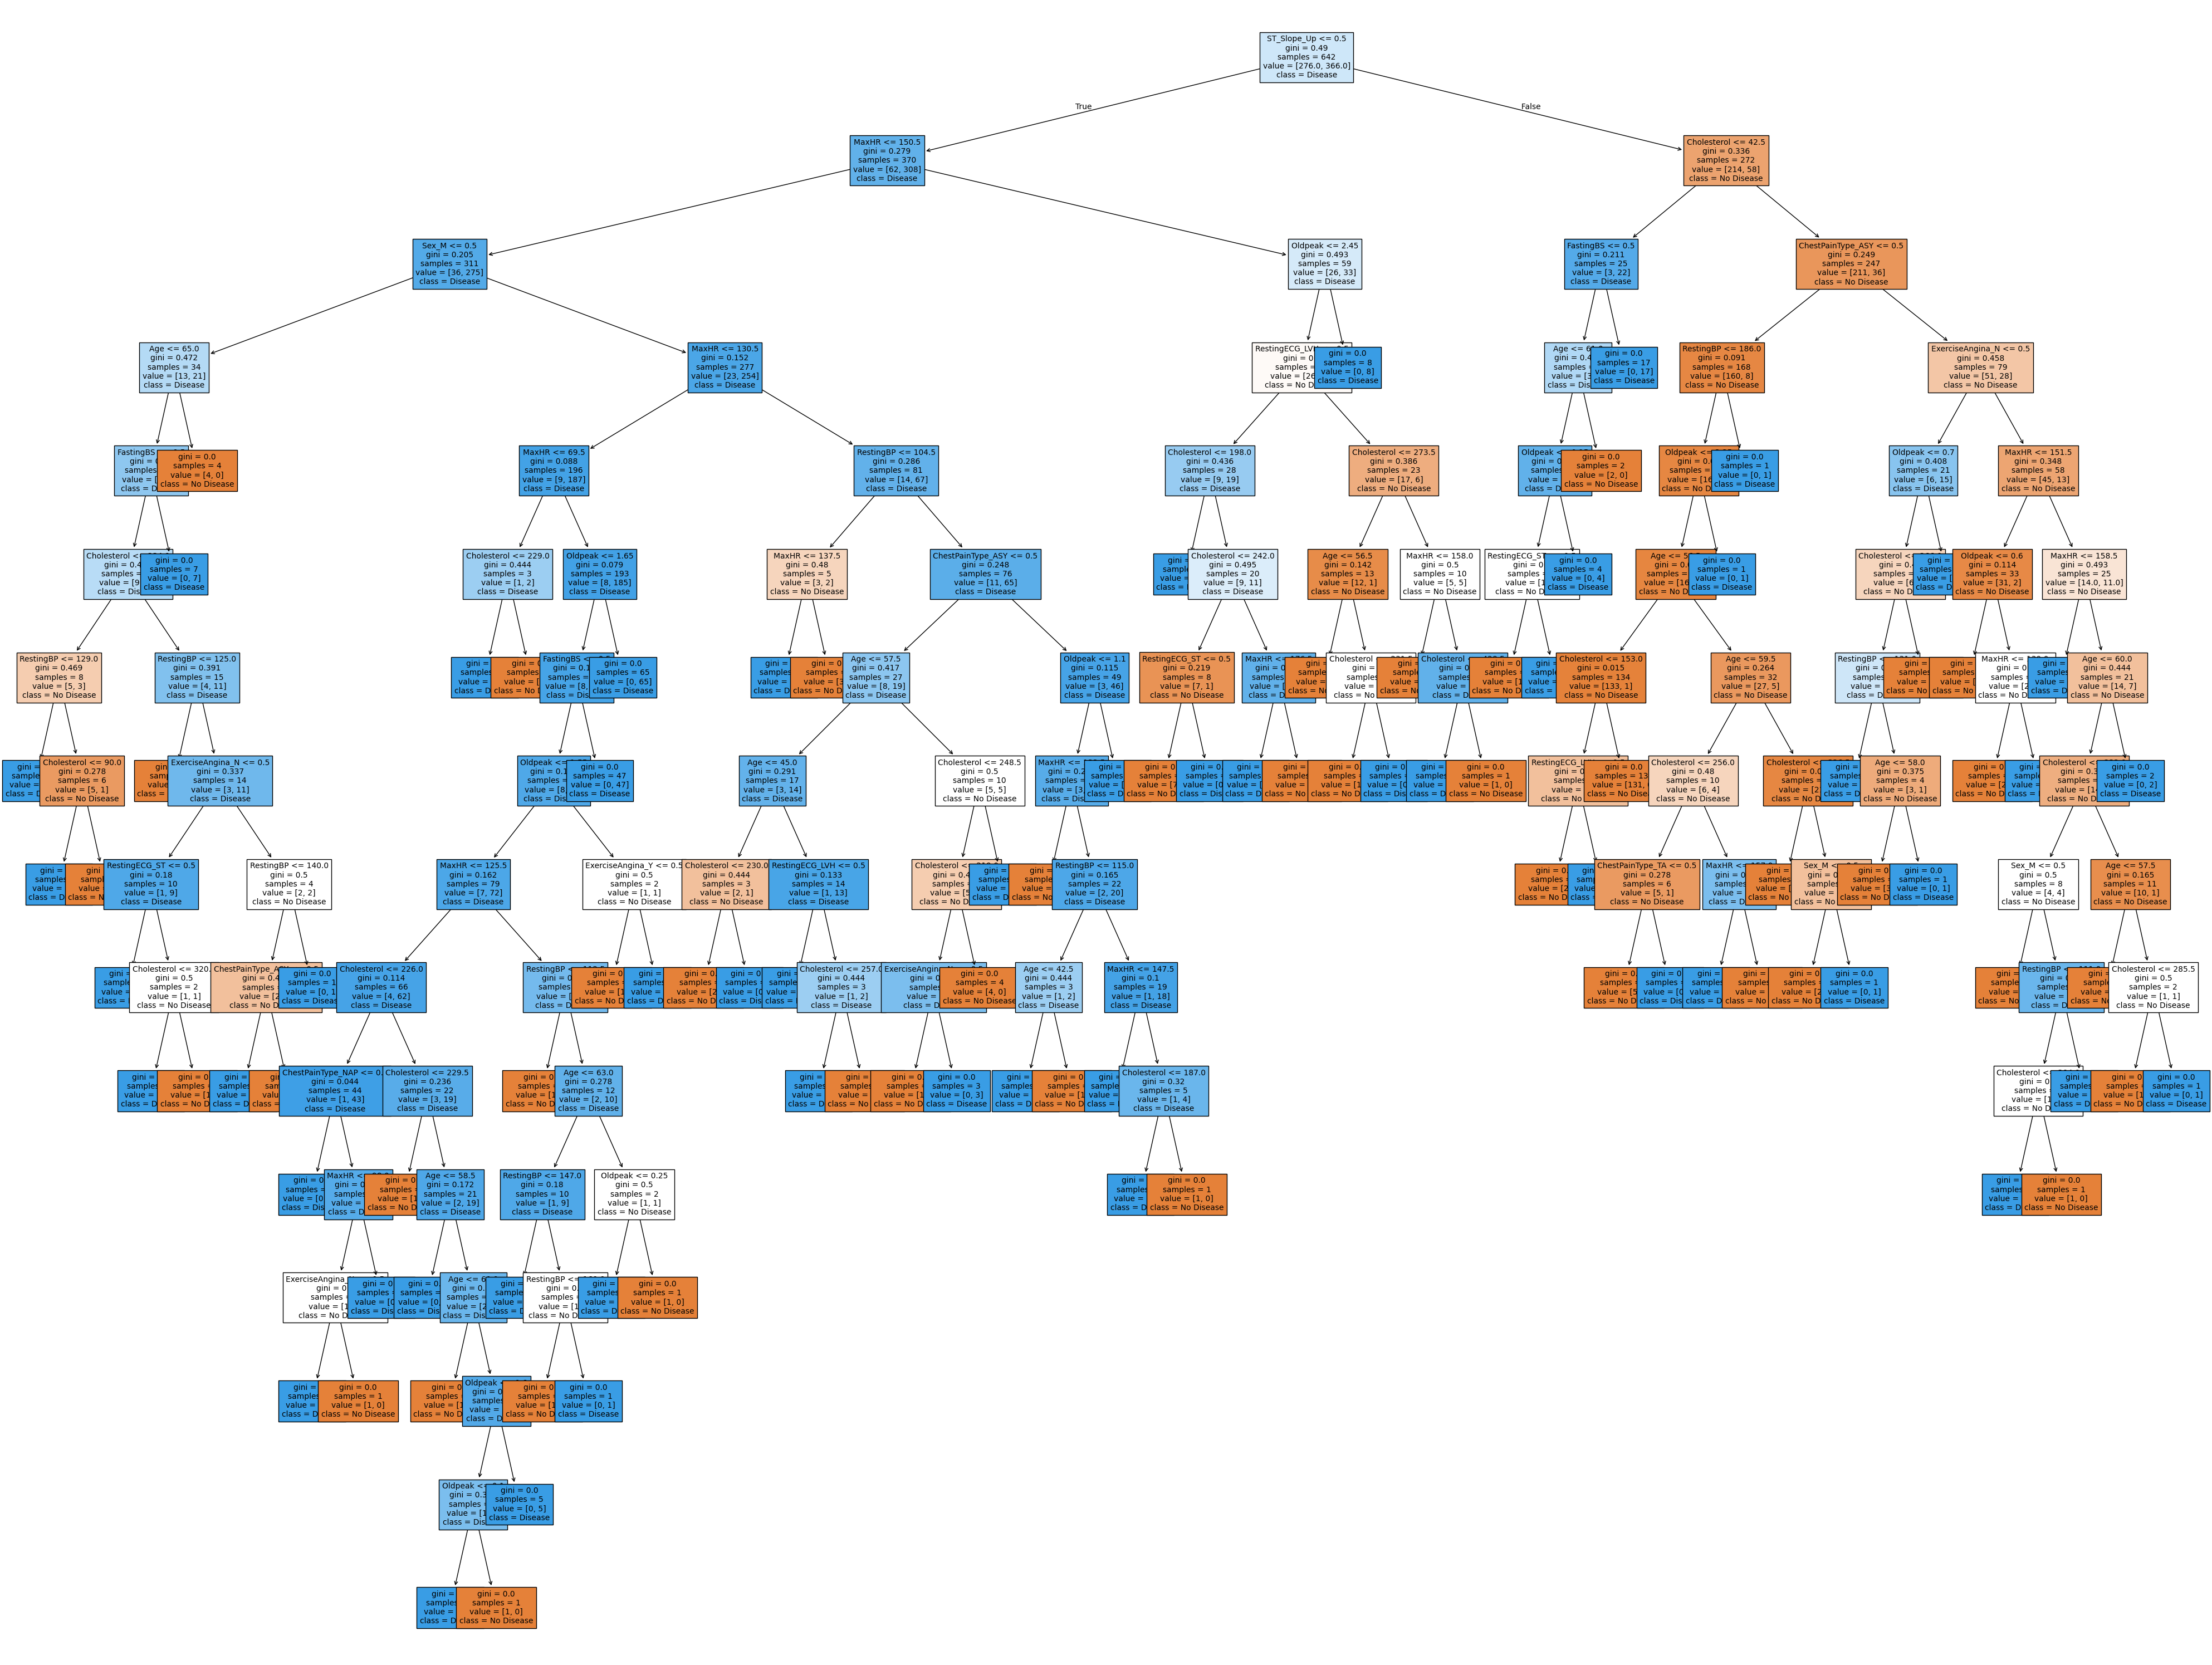

In [7]:
# create and train decision tree with no max depth
clf0 = DecisionTreeClassifier()
clf0 = clf0.fit(X_train, y_train)

# visualize tree
plt.figure("Decision Tree", figsize=(40,30))
plot_tree(clf0, fontsize=10, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.tight_layout()
plt.show()

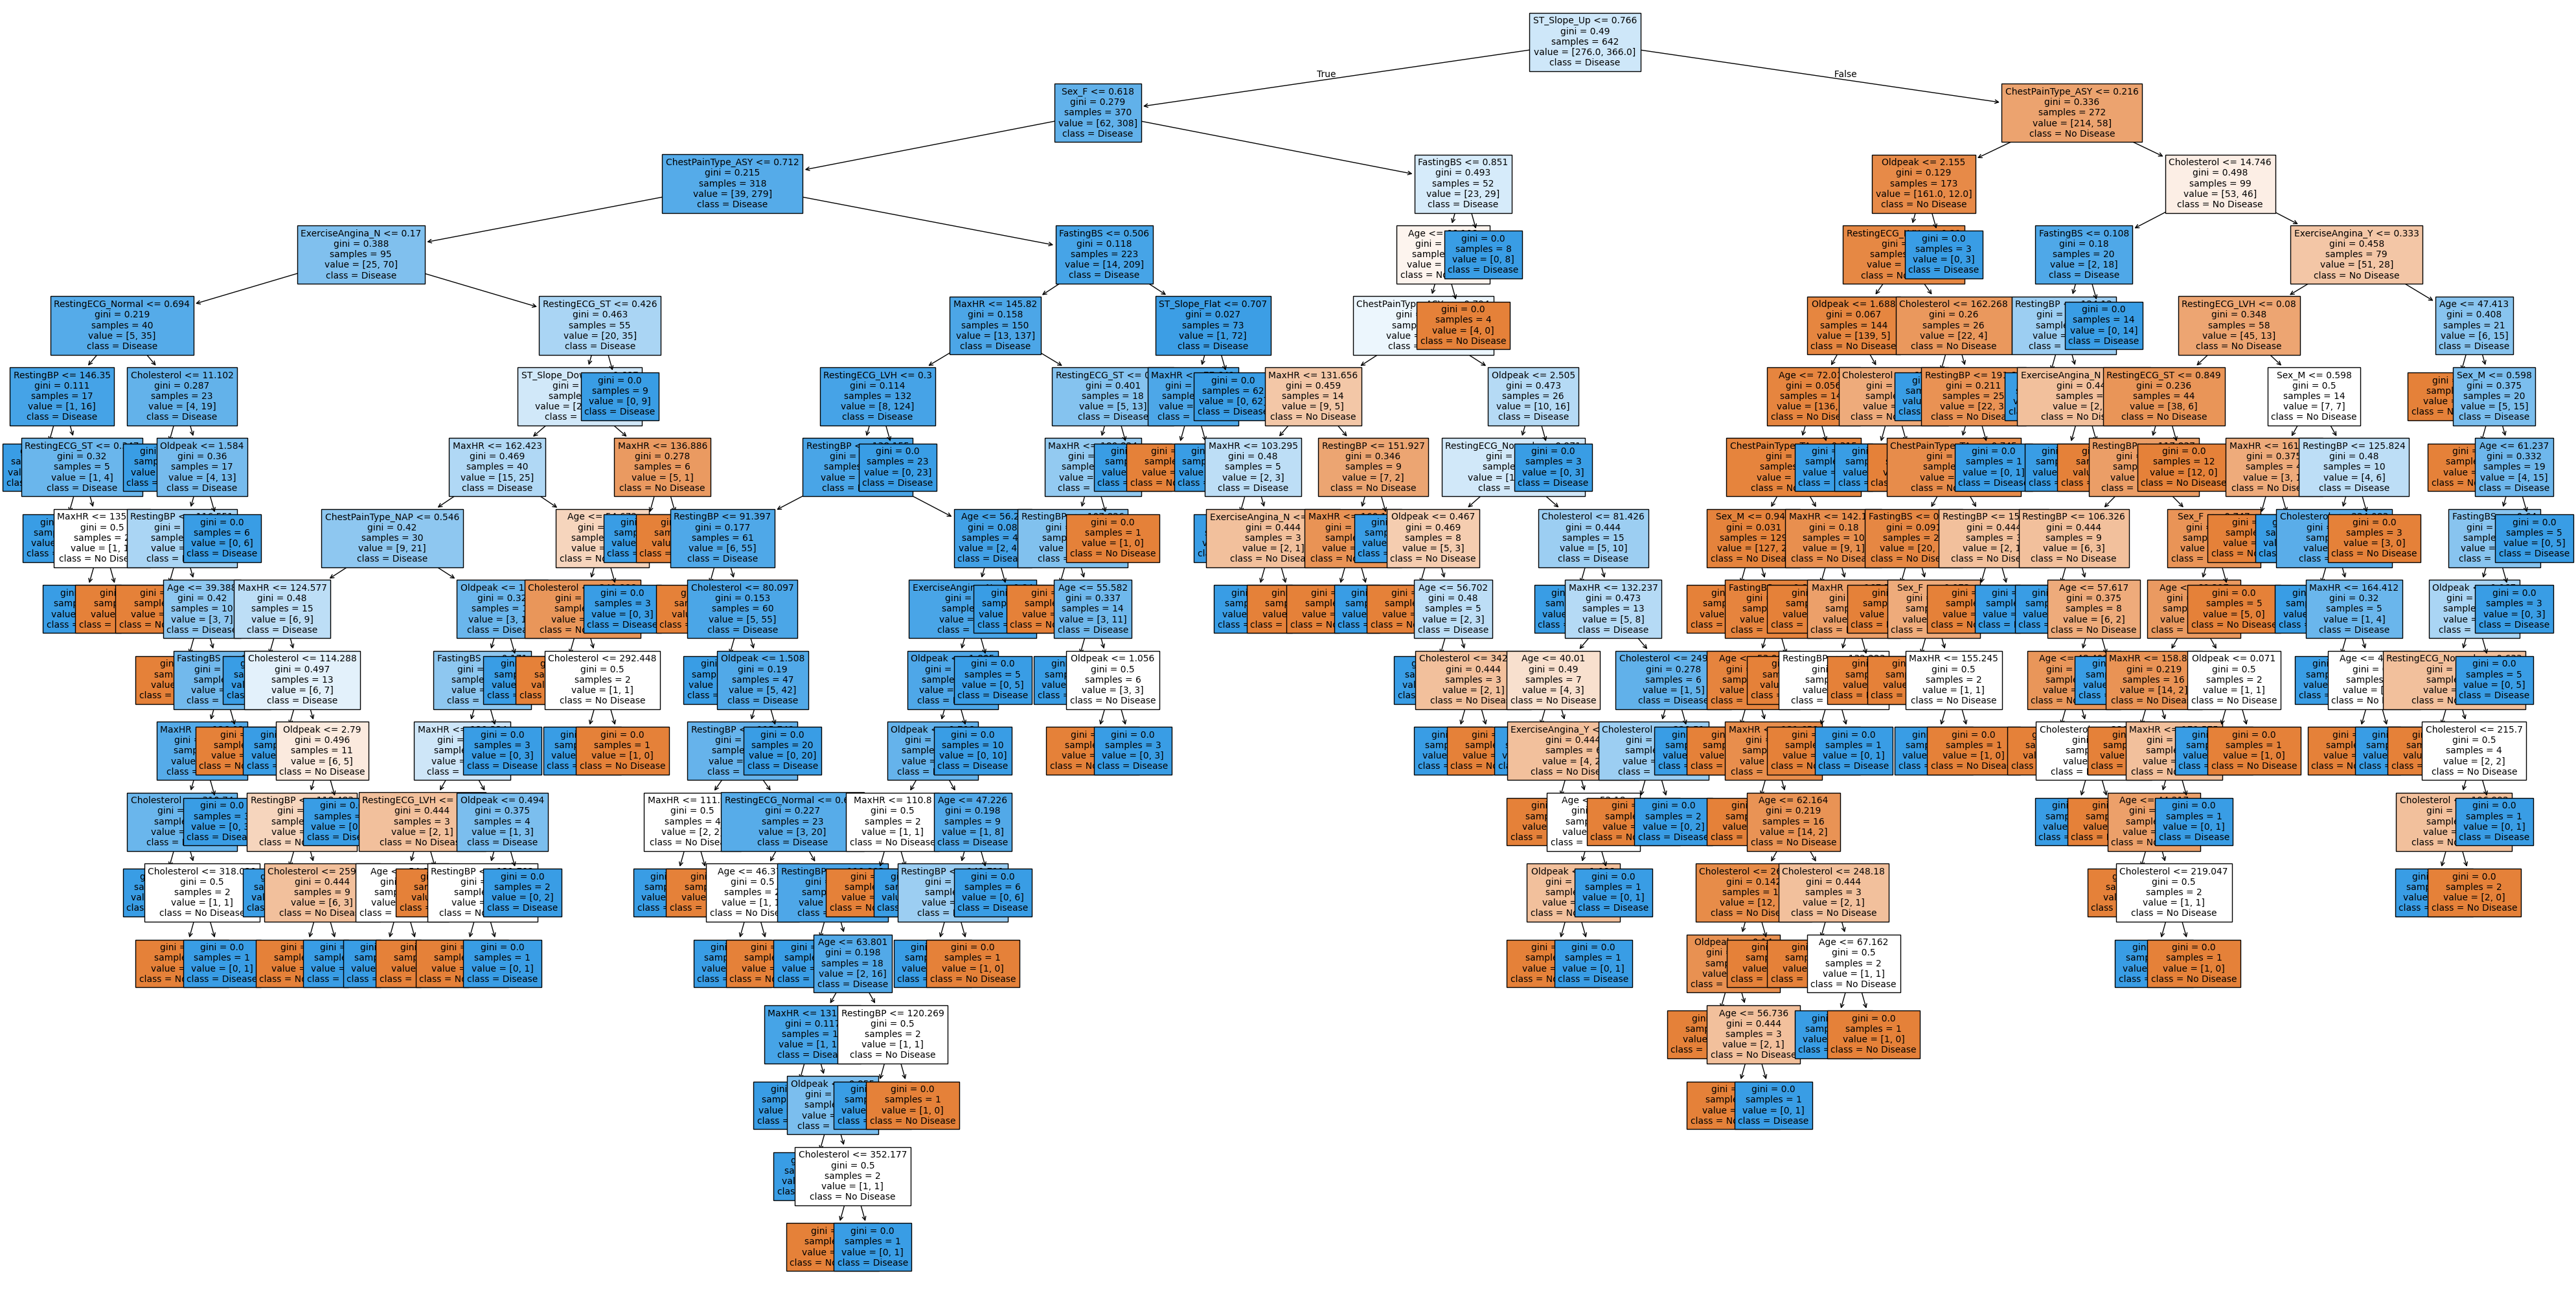

In [8]:
# create and train decision tree with random splitter
clf = DecisionTreeClassifier(splitter="random")
clf = clf.fit(X_train, y_train)

# visualize tree
plt.figure("Decision Tree", figsize=(40,20))
plot_tree(clf, fontsize=10, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.tight_layout()
plt.show()

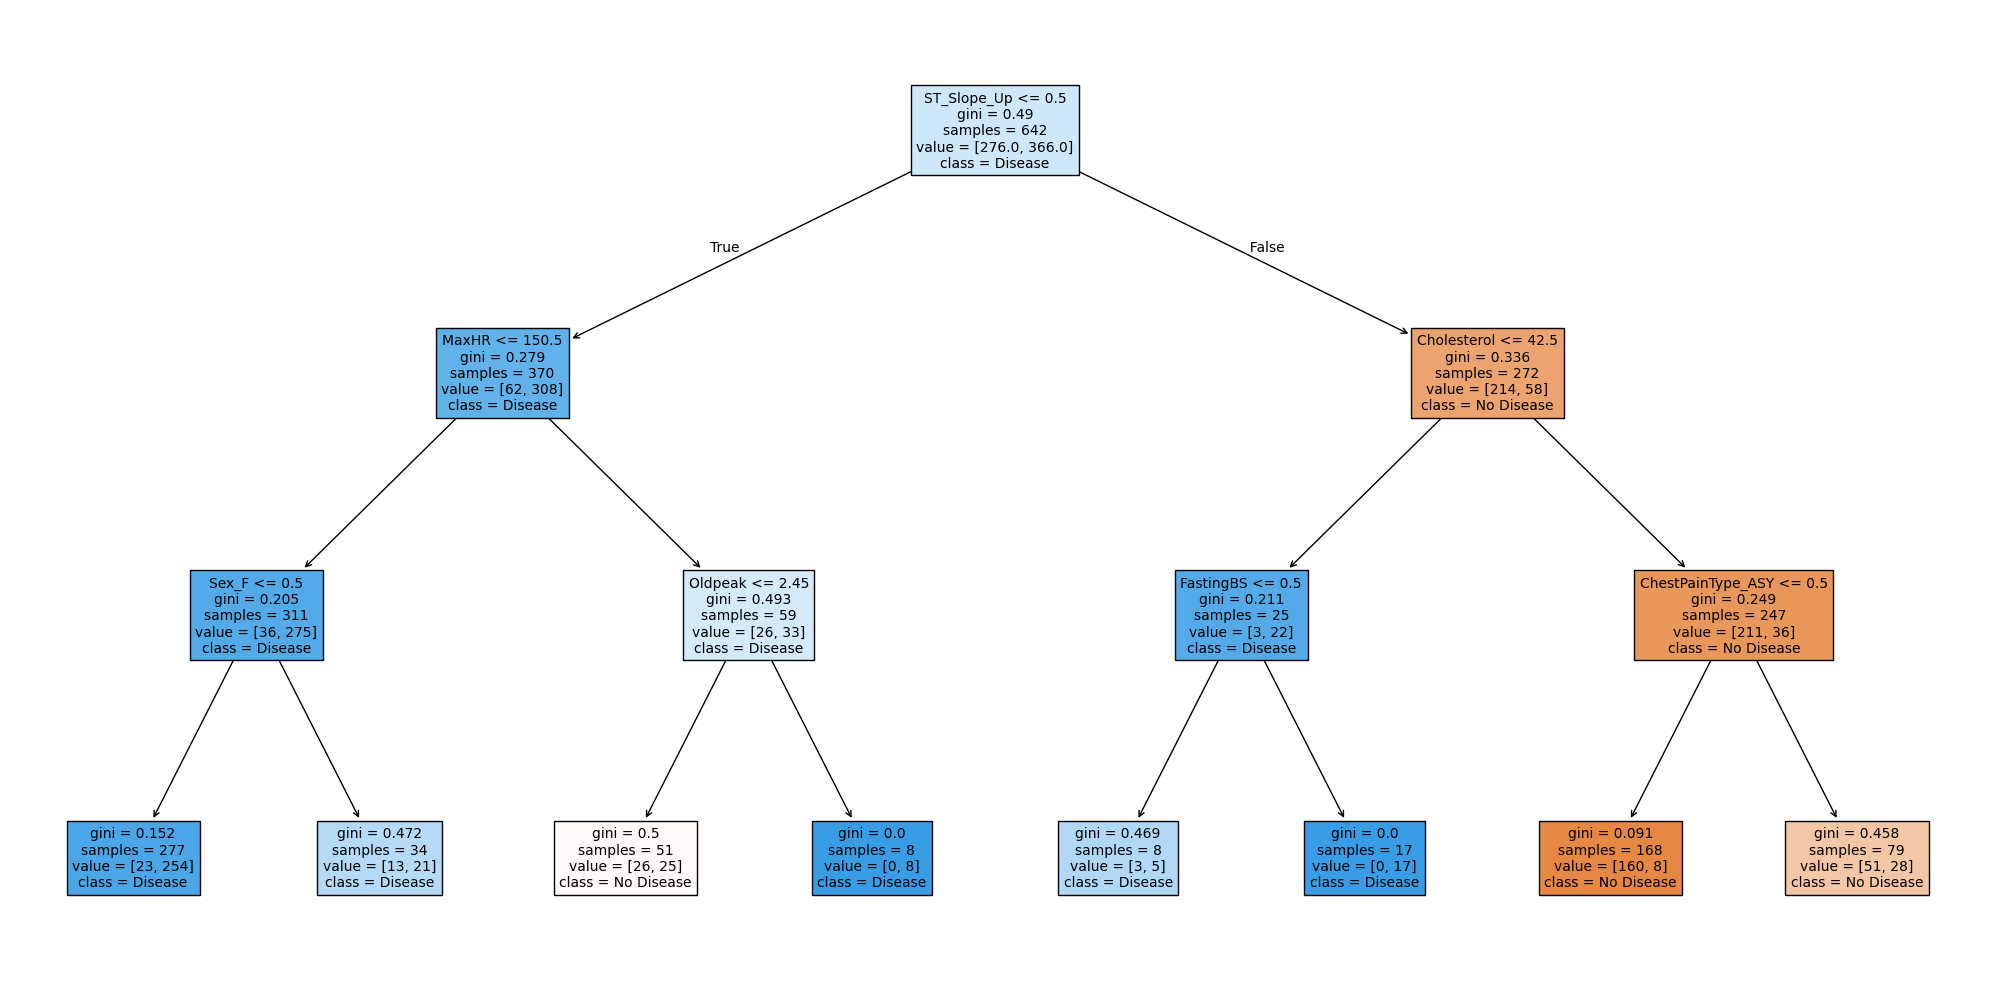

In [9]:
# create and train decision tree with max depth of 3
clf2 = DecisionTreeClassifier(max_depth = 3)
clf2 = clf2.fit(X_train, y_train)
# visualize tree
plt.figure("Decision Tree", figsize=(20,10))
plot_tree(clf2, fontsize=10, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.tight_layout()
plt.show()

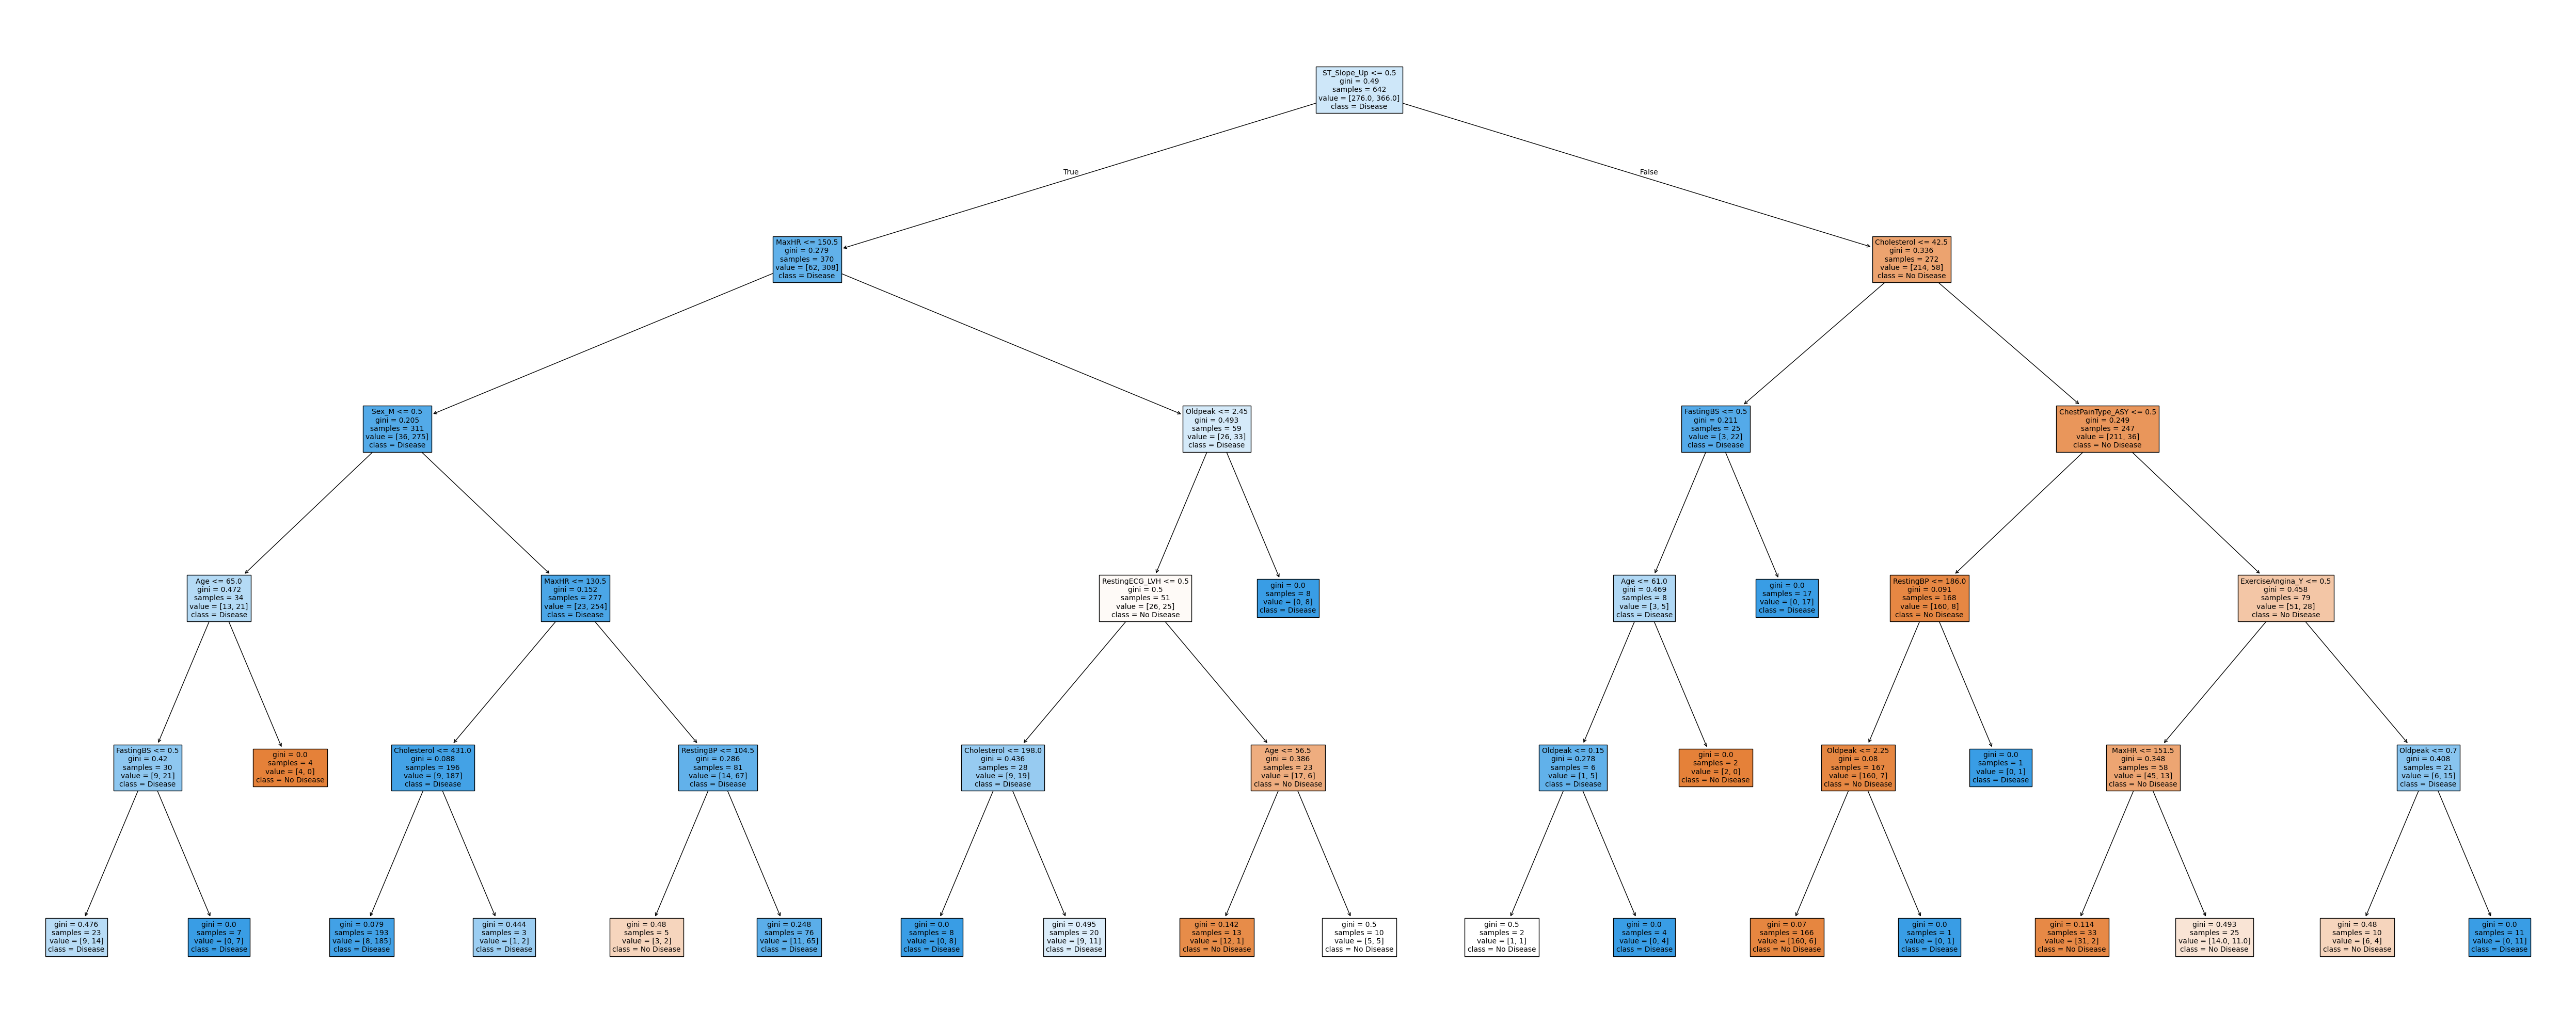

In [10]:
# create and train decision tree with max depth of 5
clf3 = DecisionTreeClassifier(max_depth = 5)
clf3 = clf3.fit(X_train, y_train)
# visualize tree
plt.figure("Decision Tree", figsize=(50,20))
plot_tree(clf3, fontsize=10, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.tight_layout()
plt.show()

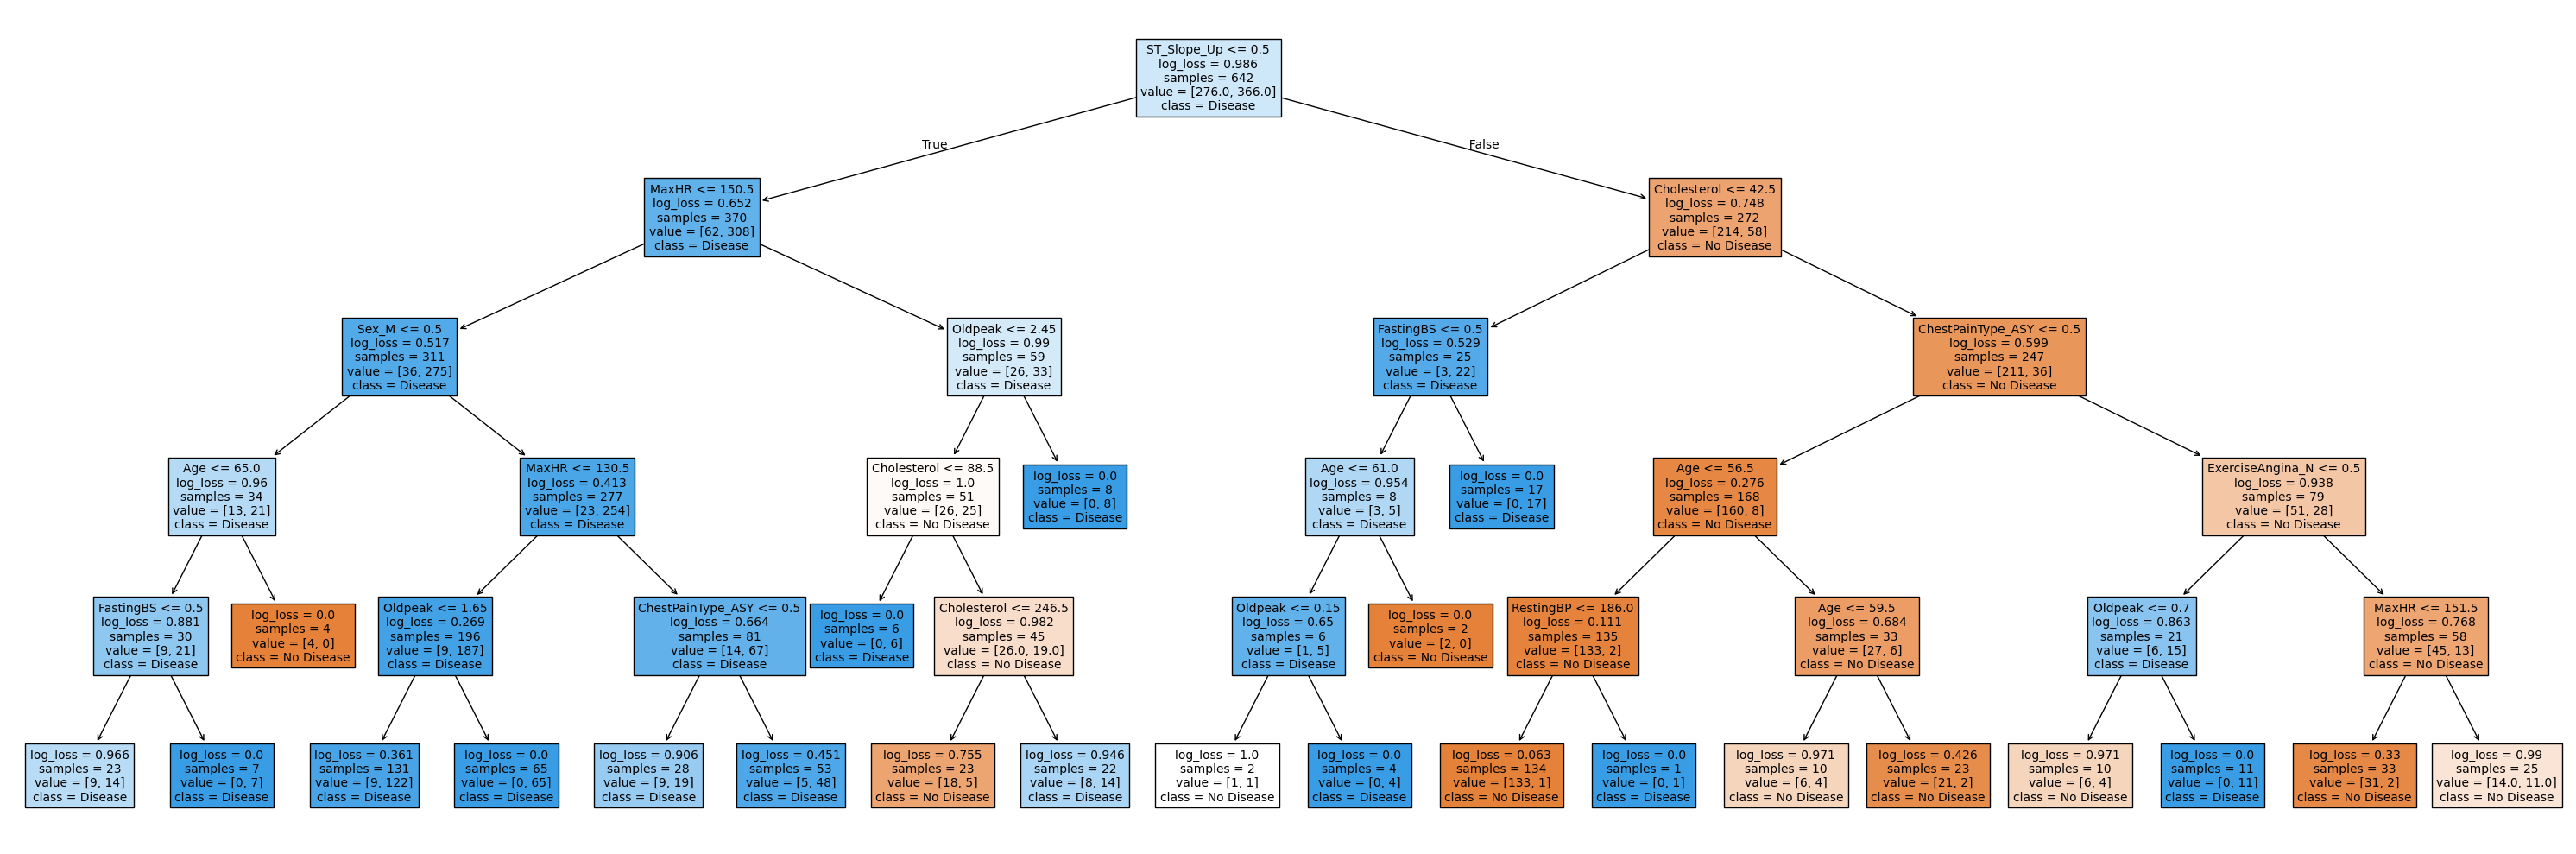

In [11]:
# create and train decision tree with log_loss criterion
clf4 = DecisionTreeClassifier(criterion="log_loss", max_depth=5)
clf4 = clf4.fit(X_train, y_train)
# visualize tree
plt.figure("Decision Tree", figsize=(30,10))
plot_tree(clf4, fontsize=10, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.tight_layout()
plt.show()

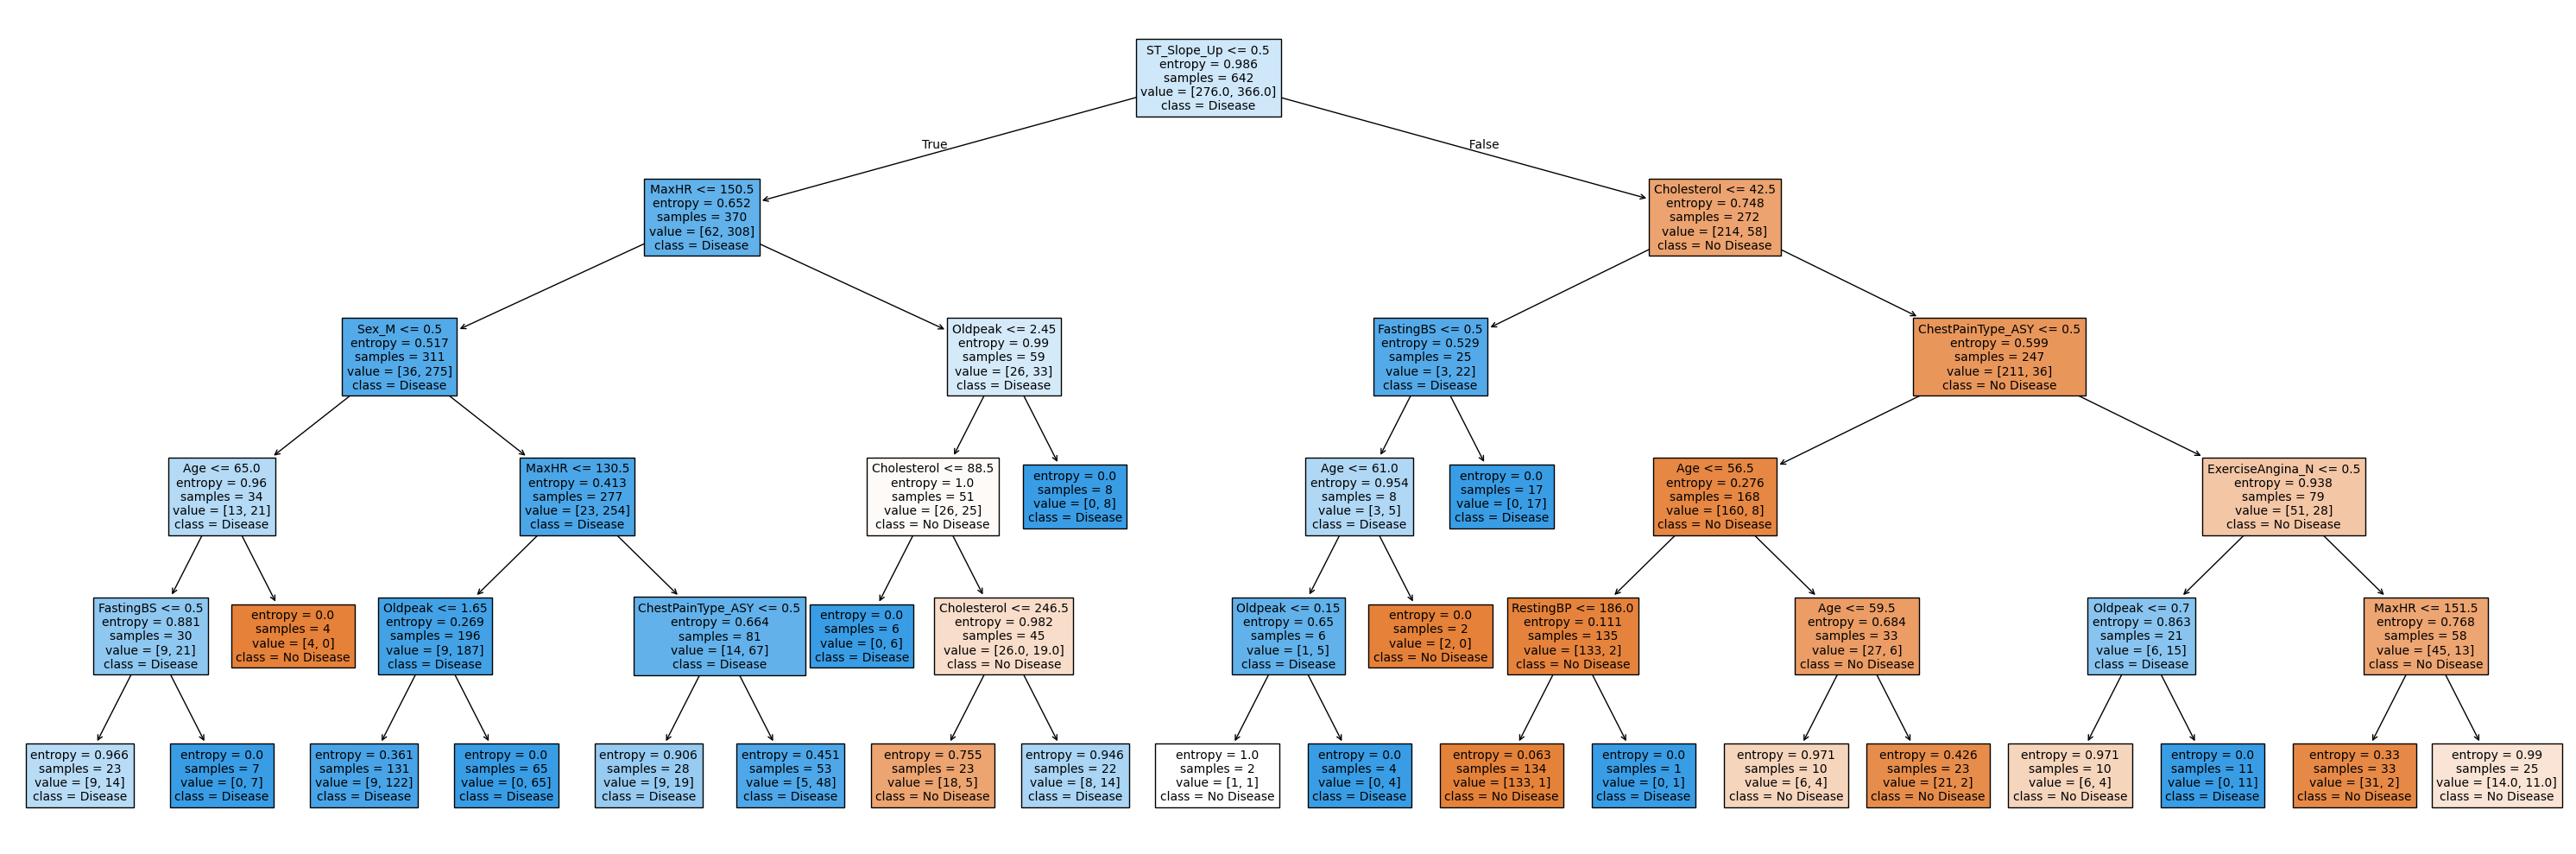

In [12]:
# create and train decision tree with entropy criterion
clf5 = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf5 = clf5.fit(X_train, y_train)
# visualize tree
plt.figure("Decision Tree", figsize=(30,10))
plot_tree(clf5, fontsize=10, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.tight_layout()
plt.show()

As the graph becomes deeper, it gets more complex (increases the number of splits and decision nodes). A deeper graph also increases the chance of overfitting, because of the fact that a deeper graph means more intricate relationships between these features, resulting in leaf nodes that are very pure. In turn, the model has a chance of being overfit, because it creates in depth relationships with all the given features.
On the other hand, a shallower tree (a tree with less depth) will be less complex, as it requires less splits and less decision nodes. In turn, it will also be trained on less parameters, resulting in it being less likely to overfit the data.

Resources:

https://carpentries-incubator.github.io/ml4bio-workshop/04-trees-overfitting/index.html#:~:text=It%20is%20easy%20to%20go,model%20has%20too%20many%20features.



## 2. Do some research on what sensitivity analysis is and how it is performed (include citations). Perform a sensitivity analysis to measure the impact of at least two input features on your model's decision boundary.

Sensitivity analysis is an analysis of how much impact each feature has on the model's prediction. In order ot determine how much impact some feature has on the dataset, we can "ignore the feature" (such as by removing it from the dataset), train the model, and analyze the output. If we can see that the ouptut of the model does not drastically change once removing the feature, we can infer that the feature does not have a large impact on the prediction.

Resources:

https://medium.com/@einat_93627/understand-your-black-box-model-using-sensitivity-analysis-practical-guide-ef6ac4175e55

In [13]:
# sensitivity analysis

# table that relates each feature to their importance in the model
importances = clf3.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': (importances*100).round(2)
})

feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

feature_importance

Feature  Importance
19        ST_Slope_Up       55.74
2         Cholesterol       12.66
4               MaxHR        7.61
6   ChestPainType_ASY        4.69
5             Oldpeak        4.58
0                 Age        3.51
13   ExerciseAngina_Y        3.44
11              Sex_M        2.52
14     RestingECG_LVH        2.04
1           RestingBP        1.75
3           FastingBS        1.47
7   ChestPainType_ATA        0.00
10              Sex_F        0.00
9    ChestPainType_TA        0.00
8   ChestPainType_NAP        0.00
12   ExerciseAngina_N        0.00
15  RestingECG_Normal        0.00
16      RestingECG_ST        0.00
17      ST_Slope_Down        0.00
18      ST_Slope_Flat        0.00

# Task 2

From the Bagging and Boosting ensemble methods pick any one algorithm
from each category. Implement both the algorithms using the same data.

In [14]:
# bagging ensamble method
bagging_model = RandomForestClassifier(n_estimators=50)
bagging_model.fit(X_train, y_train)

# boosting ensamble method
boosting_model = AdaBoostClassifier(n_estimators=50)
boosting_model.fit(X_train, y_train)

AdaBoostClassifier()

## 1. Use stratified k-fold cross-validation with at least three different folds (e.g., 5, 10, 15). You may do your own research on this technique (include citations).

Stratified k-fold cross-validation is a technique used to evalute a model, and is particularly useful for classification models. It builds off the k-fold cross-validation technique, which works by splitting the given data into multiple parts. It then trains the model on some of these parts, and then tests the model on the splits that were not used for training. It does this part multiple times. Through this process, the goal is to be able to create a model that is prone to overfitting.

Stratified k-fold cross-validation differs from regular k-fold cross-validation, because of the fact that stratification. Stratification is a sampling technique which aims to have the sample data be proportional to the original dataset. For instance, if there is 40% of Class 1, and 60% of class 2 in the original dataset, stratification hopes to maintain this same ratio in the sampled dataset.

Resources:

https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/

https://medium.com/@juanc.olamendy/a-comprehensive-guide-to-stratified-k-fold-cross-validation-for-unbalanced-data-014691060f17

https://www.geeksforgeeks.org/cross-validation-machine-learning/

https://www.linkedin.com/advice/1/how-stratified-sampling-used-machine-learning-fwtrf

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

### 2. Evaluate the models using any three-evaluation metrics of your choice (e.g. accuracy, Precision, F1-score etc.).

In [15]:
number_splits = [5, 10, 15]
results = []

# iterate thorugh all the variation sof splits
for j in number_splits:
  # initialize stratified k fold with j splits
  cv = StratifiedKFold(n_splits=j)

  # perform cross validation, using accuracy, precision, and f1 score for scoring measurement
  n_scores_accuracy = cross_val_score(bagging_model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
  n_scores_precision = cross_val_score(bagging_model, X, y, scoring="precision", cv=cv, n_jobs=-1)
  n_scores_f1 = cross_val_score(bagging_model, X, y, scoring="f1", cv=cv, n_jobs=-1)

  # average out all the scores
  average = 0
  for k in n_scores_accuracy:
    average += k

  average2 = 0
  for k in n_scores_precision:
    average2 += k

  average3 = 0
  for k in n_scores_f1:
    average3 += k

  # put output in dictionary format so it is easier to dispaly in a pd
  output = {
      'BaggingOrBoosting': 'Bagging',
      'NumberOfFolds' : j,
      'accuracy' : (average/len(n_scores_accuracy)).round(2),
      'f1' : (average3/len(n_scores_f1)).round(2),
      'precision' : (average2/len(n_scores_precision)).round(2)
  }

  # perform cross validation, using accuracy, precision, and f1 score for scoring measurement
  n_scores_accuracy_boosting = cross_val_score(boosting_model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
  n_scores_precision_boosting = cross_val_score(boosting_model, X, y, scoring="precision", cv=cv, n_jobs=-1)
  n_scores_f1_boosting = cross_val_score(boosting_model, X, y, scoring="f1", cv=cv, n_jobs=-1)

  # average out all the scores
  average = 0
  for k in n_scores_accuracy_boosting:
    average += k

  average2 = 0
  for k in n_scores_precision_boosting:
    average2 += k

  average3 = 0
  for k in n_scores_f1_boosting:
    average3 += k

  # put output in dictionary format so it is easier to dispaly in a pd
  output2 = {
      'BaggingOrBoosting': 'Boosting',
      'NumberOfFolds' : j,
      'accuracy' : (average/len(n_scores_accuracy_boosting)).round(2),
      'f1' : (average3/len(n_scores_f1_boosting)).round(2),
      'precision' : (average2/len(n_scores_precision_boosting)).round(2)
  }

  results.append(output)
  results.append(output2)

In [16]:
results_df = pd.DataFrame(results)
results_df

BaggingOrBoosting  NumberOfFolds  accuracy    f1  precision
0           Bagging              5      0.83  0.84       0.85
1          Boosting              5      0.82  0.83       0.86
2           Bagging             10      0.85  0.86       0.86
3          Boosting             10      0.84  0.85       0.87
4           Bagging             15      0.87  0.87       0.86
5          Boosting             15      0.85  0.87       0.88

It seems that Boosting consistently outperforms Bagging across all evalutaion techniques, and all number of folds. Therefore, it seems that the performance does not chance based on the evalutation metric used, but rather it changes based on if we use Bagging or Boosting. Moreover, Boosting seems to be doing the best, due to the fact that Boosting builds its models sequentially, whereas Bagging builds its models in parallel. By building sequentially, Boosting is able to correct its previous errors (which is likely why it is consistently evaluating better than Bagging). Bagging can not correct its past errors, as it builds its models in parallel.

# Task 3 Compare the effectiveness of the three models implemented above. Analyze the results using the following:

## A confusion matrix for one selected test fold.

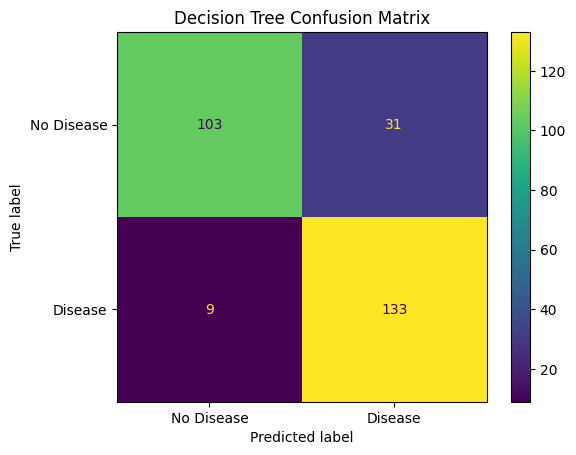

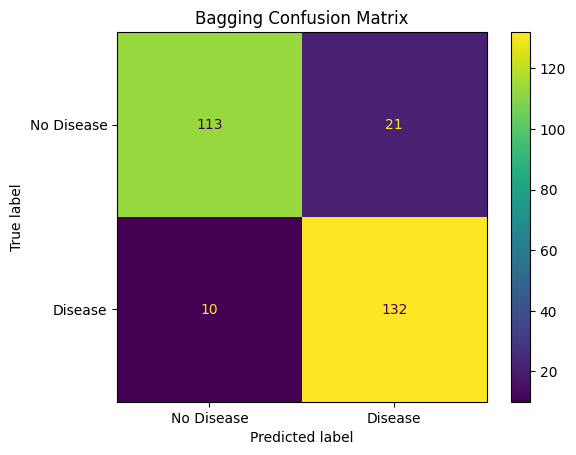

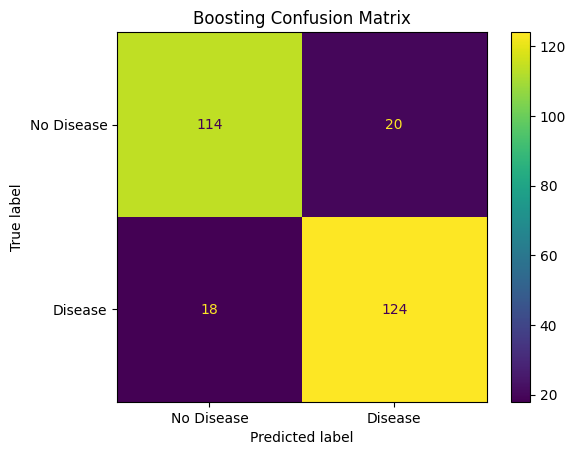

In [17]:
# since we already did train test split, we can use that data as our "fold"

# make predictions
y_pred_decision = clf3.predict(X_test)
y_pred_bagging = bagging_model.predict(X_test)
y_pred_boosting = boosting_model.predict(X_test)


# confusion matrix for regular Decision Tree
clf_cm = confusion_matrix(y_test, y_pred_decision)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=clf_cm, display_labels=["No Disease", "Disease"])
confusion_matrix_plot.plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()

# confusion matrix for Bagging
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=cm_bagging, display_labels=["No Disease", "Disease"])
confusion_matrix_plot.plot()
plt.title("Bagging Confusion Matrix")
plt.show()

# confusion matrix for Boosting
cm_boosting = confusion_matrix(y_test, y_pred_boosting)
confusion_matrix_plot2 = ConfusionMatrixDisplay(confusion_matrix=cm_boosting, display_labels=["No Disease", "Disease"])
confusion_matrix_plot2.plot()
plt.title("Boosting Confusion Matrix")
plt.show()

## A statistical test (e.g., paired t-test) to determine if differences between models are significant.

In [19]:
# Store F1 scores for each fold
bagging_f1_scores = []
boosting_f1_scores = []
clf_f1_scores = []

# loop through each train/test split generated by StratifiedKFold
cv = StratifiedKFold(n_splits=5)
for train_idx, test_idx in cv.split(X, y):
    # split the data into training and testing sets using the current fold indices
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # fit each model to the data
    bagging_model.fit(X_train, y_train)
    boosting_model.fit(X_train, y_train)
    clf3.fit(X_train, y_train)

    # predict
    y_pred_bagging = bagging_model.predict(X_test)
    y_pred_boosting = boosting_model.predict(X_test)
    y_pred_clf = clf3.predict(X_test)

    # comput f1 scores
    bagging_f1_scores.append(f1_score(y_test, y_pred_bagging))
    boosting_f1_scores.append(f1_score(y_test, y_pred_boosting))
    clf_f1_scores.append(f1_score(y_test, y_pred_clf))


# boosting vs bagging
t_stat1, p_value1 = ttest_rel(boosting_f1_scores, bagging_f1_scores)
print(f"Boosting vs Bagging:\nt-test value= {t_stat1:.4f}, p-value = {p_value1:.4f}")

# boosting vs clf3
t_stat2, p_value2 = ttest_rel(boosting_f1_scores, clf_f1_scores)
print(f"Boosting vs clf3:\nt-test value = {t_stat2:.4f}, p-value = {p_value2:.4f}")

# bagging vs clf3
t_stat3, p_value3 = ttest_rel(bagging_f1_scores, clf_f1_scores)
print(f"Bagging vs clf3:\nt-value = {t_stat3:.4f}, p-value = {p_value3:.4f}")



Boosting vs Bagging:
t-test value= -0.1768, p-value = 0.8682
Boosting vs clf3:
t-test value = 0.7510, p-value = 0.4944
Bagging vs clf3:
t-value = 1.1147, p-value = 0.3274


Resources:

https://www.nature.com/articles/s41598-024-56706-x

A discussion on the trade-off between bias and variance for each model.

## Decision Tree


*   Because of the fact that decision trees can create complex relationships given data, there is usually low bias in these models
*   However, Decision Trees tend to have high variance, due to the fact that they can easily overfit data

## Bagging


*   Due to the fact that each model will have the same bias level, bagging does not tend to reduce bias
*   However, bagging reduces variance greatly, because by averaging predicts over numerous models, it is able to reduce noise in given data


## AdaBoost


*   Because this type of model sequentailly builds its models, bias is greatly reduced. This is because each model can learn from the previous model's mistakes.
*   However, boosing can increase variance, because the model might be fit to noisy data.

